<a href="https://colab.research.google.com/github/ppkk0906/Caba_nlp/blob/main/DL3_0_%EA%B3%BC%EB%8C%80%EC%A0%81%ED%95%A9_%EA%B3%BC%EC%86%8C%EC%A0%81%ED%95%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 과대적합과 과소적합
    머신러닝의 근본적인 이슈는 최적화와 일반화 사이의 줄다리기이다.

- 최적화: 훈련 데이터 내에서 최고의 성능을 얻고자 모델을 조정(학습)
- 일반화: 훈련된 모델이 본 적이 없는 데이터에서 얼마나 잘 예측을 수행하는지 의미
- 과대적합: 학습 데이터에만 최적화되어 일반화가 제대로 안되는 현상
    - 원인: 과다한 변수, 데이터 부족, 
- 과소적랍: 학습 데이터에도 제대로 최적화가 안되는 현상
    - 원인: 종속 변수를 제대로 반영하지 못하는 변수 구성, 

In [1]:
from keras.datasets import imdb
import numpy as np
from keras import models, layers
import matplotlib.pyplot as plt
from keras import regularizers


(train_data, train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [2]:
def vectorize_sequences(sequences, ndim=10000):
  results = np.zeros((len(sequences), ndim))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [3]:
original_model = models.Sequential()
original_model.add(layers.Dense(16, activation="relu", input_shape=(10000, )))
original_model.add(layers.Dense(16, activation="relu"))
original_model.add(layers.Dense(1, activation="sigmoid"))
original_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
original_hist = original_model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_test, y_test))


Epoch 1/20
49/49 [==============================] - 4s 59ms/step - loss: 0.5453 - acc: 0.7436 - val_loss: 0.3255 - val_acc: 0.8838
Epoch 2/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2636 - acc: 0.9113 - val_loss: 0.3161 - val_acc: 0.8703
Epoch 3/20
49/49 [==============================] - 2s 39ms/step - loss: 0.1923 - acc: 0.9337 - val_loss: 0.2832 - val_acc: 0.8871
Epoch 4/20
49/49 [==============================] - 2s 37ms/step - loss: 0.1625 - acc: 0.9454 - val_loss: 0.3295 - val_acc: 0.8702
Epoch 5/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1379 - acc: 0.9552 - val_loss: 0.3174 - val_acc: 0.8803
Epoch 6/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1196 - acc: 0.9588 - val_loss: 0.3401 - val_acc: 0.8736
Epoch 7/20
49/49 [==============================] - 2s 37ms/step - loss: 0.1041 - acc: 0.9651 - val_loss: 0.3708 - val_acc: 0.8700
Epoch 8/20
49/49 [==============================] - 2s 38ms/step - loss: 0.0896 - a

In [4]:
#네트워크 크기 축소
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(8, activation="relu", input_shape=(10000, )))
smaller_model.add(layers.Dense(8, activation="relu"))
smaller_model.add(layers.Dense(1, activation="sigmoid"))
smaller_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
smaller_hist = smaller_model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 49ms/step - loss: 0.6251 - acc: 0.5955 - val_loss: 0.5226 - val_acc: 0.7410
Epoch 2/20
49/49 [==============================] - 2s 36ms/step - loss: 0.4743 - acc: 0.8451 - val_loss: 0.4679 - val_acc: 0.8726
Epoch 3/20
49/49 [==============================] - 2s 36ms/step - loss: 0.4177 - acc: 0.9096 - val_loss: 0.4494 - val_acc: 0.8646
Epoch 4/20
49/49 [==============================] - 2s 36ms/step - loss: 0.3762 - acc: 0.9332 - val_loss: 0.4439 - val_acc: 0.8692
Epoch 5/20
49/49 [==============================] - 2s 36ms/step - loss: 0.3463 - acc: 0.9476 - val_loss: 0.4339 - val_acc: 0.8741
Epoch 6/20
49/49 [==============================] - 2s 36ms/step - loss: 0.3166 - acc: 0.9598 - val_loss: 0.4697 - val_acc: 0.8620
Epoch 7/20
49/49 [==============================] - 2s 36ms/step - loss: 0.2896 - acc: 0.9653 - val_loss: 0.4474 - val_acc: 0.8681
Epoch 8/20
49/49 [==============================] - 2s 36ms/step - loss: 0.2634 - a

In [5]:
#네트워크 크기 확대
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024, activation="relu", input_shape=(10000, )))
bigger_model.add(layers.Dense(1024, activation="relu"))
bigger_model.add(layers.Dense(1, activation="sigmoid"))
bigger_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
bigger_hist = bigger_model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/20
49/49 [==============================] - 33s 666ms/step - loss: 0.8472 - acc: 0.6967 - val_loss: 0.2844 - val_acc: 0.8833
Epoch 2/20
49/49 [==============================] - 32s 660ms/step - loss: 0.2147 - acc: 0.9179 - val_loss: 0.4983 - val_acc: 0.8158
Epoch 3/20
49/49 [==============================] - 32s 664ms/step - loss: 0.1218 - acc: 0.9522 - val_loss: 0.7189 - val_acc: 0.7968
Epoch 4/20
49/49 [==============================] - 32s 663ms/step - loss: 0.0653 - acc: 0.9833 - val_loss: 0.4861 - val_acc: 0.8822
Epoch 5/20
49/49 [==============================] - 32s 665ms/step - loss: 0.0230 - acc: 0.9973 - val_loss: 0.4213 - val_acc: 0.8834
Epoch 6/20
49/49 [==============================] - 32s 663ms/step - loss: 0.0019 - acc: 0.9999 - val_loss: 0.6562 - val_acc: 0.8854
Epoch 7/20
49/49 [==============================] - 32s 663ms/step - loss: 0.0280 - acc: 0.9975 - val_loss: 0.5418 - val_acc: 0.8811
Epoch 8/20
49/49 [==============================] - 32s 664ms/step - 

In [6]:
epochs = range(1,21)
original_val_loss = original_hist.history["val_loss"]
smaller_val_loss = smaller_hist.history["val_loss"]
bigger_val_loss = bigger_hist.history["val_loss"]

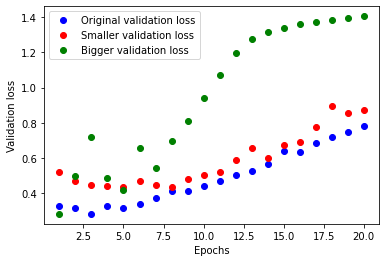

In [7]:
plt.plot(epochs, original_val_loss, 'bo', label="Original validation loss")
plt.plot(epochs, smaller_val_loss, 'ro', label="Smaller validation loss")
plt.plot(epochs, bigger_val_loss, 'go', label="Bigger validation loss")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.legend()

## 가중치 규제 추가
- L1 규제: 가중치의 절대값에 비례하는 비용이 추가 (가중치의 L1 norm)
- L2 규제(가중치 감쇠): 가중치의 제곱에 비례하는 비용이 추가 (가중치의 L2 norm)

In [8]:

l2_model = models.Sequential()
l2_model.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.001), activation="relu", input_shape=(10000, )))
l2_model.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.001), activation="relu"))
l2_model.add(layers.Dense(1, activation="sigmoid"))
l2_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
l2_model_hist = l2_model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 46ms/step - loss: 0.6070 - acc: 0.7393 - val_loss: 0.4238 - val_acc: 0.8644
Epoch 2/20
49/49 [==============================] - 2s 33ms/step - loss: 0.3665 - acc: 0.8932 - val_loss: 0.3468 - val_acc: 0.8860
Epoch 3/20
49/49 [==============================] - 2s 34ms/step - loss: 0.2879 - acc: 0.9185 - val_loss: 0.3245 - val_acc: 0.8894
Epoch 4/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2569 - acc: 0.9285 - val_loss: 0.3263 - val_acc: 0.8860
Epoch 5/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2369 - acc: 0.9324 - val_loss: 0.3244 - val_acc: 0.8872
Epoch 6/20
49/49 [==============================] - 2s 34ms/step - loss: 0.2207 - acc: 0.9428 - val_loss: 0.3314 - val_acc: 0.8842
Epoch 7/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2157 - acc: 0.9426 - val_loss: 0.3370 - val_acc: 0.8839
Epoch 8/20
49/49 [==============================] - 2s 34ms/step - loss: 0.2094 - a

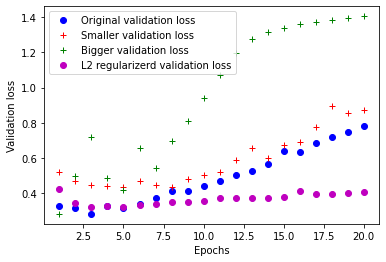

In [9]:
l2_val_loss = l2_model_hist.history["val_loss"]
plt.plot(epochs, original_val_loss, 'bo', label="Original validation loss")
plt.plot(epochs, smaller_val_loss, 'r+', label="Smaller validation loss")
plt.plot(epochs, bigger_val_loss, 'g+', label="Bigger validation loss")
plt.plot(epochs, l2_val_loss, 'mo', label="L2 regularizerd validation loss")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.legend()

### 결과
두 모델이 동일한 파라미터 수를 가지고 있더라도 L2 규제를 사용한 모델이 기본 모델보다 훨씬 과대적합에 잘 견딘다

### 과제
l1(0.0001) 모델과 비교해보세요   
l1_l2(l1=0.0001, l2=0.0001) 병행 규제를 적용한 모델과 비교하시오

In [10]:
l1_model = models.Sequential()
l1_model.add(layers.Dense(8, kernel_regularizer=regularizers.l1(0.0001), activation="relu", input_shape=(10000, )))
l1_model.add(layers.Dense(8, kernel_regularizer=regularizers.l1(0.0001), activation="relu"))
l1_model.add(layers.Dense(1, activation="sigmoid"))
l1_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
l1_model_hist = l1_model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 47ms/step - loss: 0.6511 - acc: 0.7303 - val_loss: 0.4287 - val_acc: 0.8732
Epoch 2/20
49/49 [==============================] - 2s 33ms/step - loss: 0.3776 - acc: 0.8928 - val_loss: 0.3644 - val_acc: 0.8842
Epoch 3/20
49/49 [==============================] - 2s 34ms/step - loss: 0.3123 - acc: 0.9089 - val_loss: 0.3394 - val_acc: 0.8890
Epoch 4/20
49/49 [==============================] - 2s 34ms/step - loss: 0.2810 - acc: 0.9218 - val_loss: 0.3467 - val_acc: 0.8817
Epoch 5/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2710 - acc: 0.9248 - val_loss: 0.3374 - val_acc: 0.8876
Epoch 6/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2580 - acc: 0.9281 - val_loss: 0.3632 - val_acc: 0.8757
Epoch 7/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2458 - acc: 0.9356 - val_loss: 0.3435 - val_acc: 0.8863
Epoch 8/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2389 - a

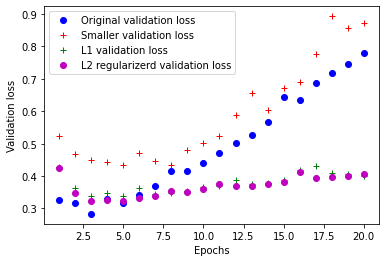

In [12]:
epochs = range(1,21)
l1_val_loss = l1_model_hist.history["val_loss"]
plt.plot(epochs, original_val_loss, 'bo', label="Original validation loss")
plt.plot(epochs, smaller_val_loss, 'r+', label="Smaller validation loss")
plt.plot(epochs, l1_val_loss, 'g+', label="L1 validation loss")
plt.plot(epochs, l2_val_loss, 'mo', label="L2 regularizerd validation loss")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.legend()

In [13]:
l12_model = models.Sequential()
l12_model.add(layers.Dense(8, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001), activation="relu", input_shape=(10000, )))
l12_model.add(layers.Dense(8, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001), activation="relu"))
l12_model.add(layers.Dense(1, activation="sigmoid"))
l12_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
l12_model_hist = l12_model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 49ms/step - loss: 0.6623 - acc: 0.7326 - val_loss: 0.4890 - val_acc: 0.8598
Epoch 2/20
49/49 [==============================] - 2s 34ms/step - loss: 0.4404 - acc: 0.8842 - val_loss: 0.4004 - val_acc: 0.8756
Epoch 3/20
49/49 [==============================] - 2s 34ms/step - loss: 0.3592 - acc: 0.9005 - val_loss: 0.3660 - val_acc: 0.8801
Epoch 4/20
49/49 [==============================] - 2s 34ms/step - loss: 0.3159 - acc: 0.9110 - val_loss: 0.3468 - val_acc: 0.8863
Epoch 5/20
49/49 [==============================] - 2s 34ms/step - loss: 0.2978 - acc: 0.9133 - val_loss: 0.3407 - val_acc: 0.8872
Epoch 6/20
49/49 [==============================] - 2s 34ms/step - loss: 0.2868 - acc: 0.9161 - val_loss: 0.3395 - val_acc: 0.8883
Epoch 7/20
49/49 [==============================] - 2s 34ms/step - loss: 0.2736 - acc: 0.9233 - val_loss: 0.3405 - val_acc: 0.8879
Epoch 8/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2657 - a

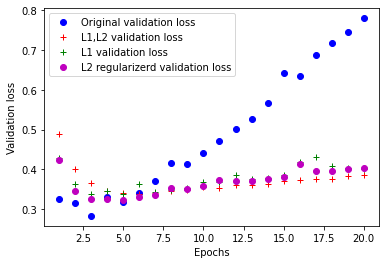

In [16]:
l12_val_loss = l12_model_hist.history["val_loss"]
plt.plot(epochs, original_val_loss, 'bo', label="Original validation loss")
plt.plot(epochs, l12_val_loss, 'r+', label="L1,L2 validation loss")
plt.plot(epochs, l1_val_loss, 'g+', label="L1 validation loss")
plt.plot(epochs, l2_val_loss, 'mo', label="L2 regularizerd validation loss")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.legend()